In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data Preparation

## Import Datasets

### sales

In [2]:
sales = pd.read_excel("datasets/sales.xlsx")

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       887 non-null    datetime64[ns]
 1   InvoiceNo  887 non-null    object        
 2   Product    887 non-null    object        
 3   Category   887 non-null    object        
 4   Quantity   887 non-null    int64         
 5   UnitPrice  887 non-null    int64         
 6   Customer   887 non-null    object        
 7   Region     887 non-null    object        
 8   Total      887 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 62.5+ KB


In [4]:
sales.sample(5)

,Date,InvoiceNo,Product,Category,Quantity,UnitPrice,Customer,Region,Total
593,2025-09-01,INV1593,Titanium Ring,Jewelry,3,250000,Customer D,Surabaya,750000
499,2025-08-23,INV1499,Gold Bracelet,Jewelry,3,550000,Customer E,Surabaya,1650000
249,2025-07-25,INV1249,Pearl Earrings,Jewelry,1,350000,Customer A,Bali,350000
5,2025-07-01,INV1005,Titanium Ring,Jewelry,1,450000,Customer C,Bandung,450000
269,2025-07-27,INV1269,Titanium Ring,Jewelry,4,450000,Customer B,Jakarta,1800000


In [5]:
sales['Product'].value_counts()

Product
Titanium Ring      191
Pearl Earrings     187
Gold Bracelet      175
Charm Pendant      172
Silver Necklace    162
Name: count, dtype: int64

In [6]:
sales['Category'].value_counts()

Category
Jewelry    887
Name: count, dtype: int64

In [7]:
sales['Quantity'].value_counts()

Quantity
3    235
4    220
1    217
2    215
Name: count, dtype: int64

In [8]:
sales['UnitPrice'].value_counts()

UnitPrice
250000    183
650000    182
350000    181
550000    180
450000    161
Name: count, dtype: int64

In [9]:
sales['Customer'].value_counts()

Customer
Customer E    189
Customer A    187
Customer C    175
Customer B    172
Customer D    164
Name: count, dtype: int64

In [10]:
sales['Region'].value_counts()

Region
Jakarta     200
Medan       181
Bandung     174
Bali        168
Surabaya    164
Name: count, dtype: int64

In [11]:
sales['Total'].value_counts()

Total
1650000    54
750000     54
650000     51
1400000    51
1300000    49
900000     49
550000     48
1050000    45
350000     45
1000000    44
2200000    43
250000     43
500000     42
2600000    42
1350000    42
1950000    40
700000     40
1800000    40
1100000    35
450000     30
Name: count, dtype: int64

### expenses

In [12]:
expenses = pd.read_excel("datasets/expenses.xlsx")

In [13]:
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         184 non-null    datetime64[ns]
 1   ExpenseType  184 non-null    object        
 2   Description  184 non-null    object        
 3   Amount       184 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 5.9+ KB


In [14]:
expenses.sample(5)

,Date,ExpenseType,Description,Amount
76,2025-08-07,Rent,Rent expense for operations,1884822
82,2025-08-09,Supplies,Supplies expense for operations,2713697
181,2025-09-29,Marketing,Marketing expense for operations,3354119
147,2025-09-10,Marketing,Marketing expense for operations,1372834
86,2025-08-12,Salaries,Salaries expense for operations,2620711


In [15]:
expenses['ExpenseType'].value_counts()

ExpenseType
Salaries     41
Supplies     36
Marketing    30
Delivery     29
Rent         24
Utilities    24
Name: count, dtype: int64

In [16]:
expenses['Description'].value_counts()

Description
Salaries expense for operations     41
Supplies expense for operations     36
Marketing expense for operations    30
Delivery expense for operations     29
Rent expense for operations         24
Utilities expense for operations    24
Name: count, dtype: int64

In [17]:
expenses['Amount'].describe().round(3)

count        184.000
mean     2630461.163
std      1291020.133
min       500917.000
25%      1443966.000
50%      2503227.500
75%      3663721.000
max      4980967.000
Name: Amount, dtype: float64

### coa

In [18]:
coa = pd.read_excel("datasets/mapping_coa.xlsx")

In [19]:
coa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     8 non-null      object
 1   Account      8 non-null      int64 
 2   AccountType  8 non-null      object
dtypes: int64(1), object(2)
memory usage: 320.0+ bytes


In [20]:
coa

,Category,Account,AccountType
0,Jewelry Sales,4000,Revenue
1,Product Cost,5000,COGS
2,Marketing,6100,OPEX
3,Utilities,6200,OPEX
4,Salaries,6300,OPEX
5,Supplies,6400,OPEX
6,Rent,6500,OPEX
7,Delivery,6600,OPEX


In [21]:
coa['Category'].value_counts()

Category
Jewelry Sales    1
Product Cost     1
Marketing        1
Utilities        1
Salaries         1
Supplies         1
Rent             1
Delivery         1
Name: count, dtype: int64

In [22]:
coa['Account'].value_counts()

Account
4000    1
5000    1
6100    1
6200    1
6300    1
6400    1
6500    1
6600    1
Name: count, dtype: int64

In [23]:
coa['AccountType'].value_counts()

AccountType
OPEX       6
Revenue    1
COGS       1
Name: count, dtype: int64

## Append Dataset

In [24]:
# Standardize Sales
sales = sales.rename(columns={
    "Total": "Amount"
})
sales["Source_Type"] = "Sales"
sales["Description"] = None

# Pilih kolom relevan dan tambahkan kolom kosong agar sama dengan Expenses
sales = sales[["Date", "Category", "Product", "Description", "Amount", "InvoiceNo", "Customer", "Region", "Source_Type"]]
sales.sample(5)

,Date,Category,Product,Description,Amount,InvoiceNo,Customer,Region,Source_Type
600,2025-09-02,Jewelry,Titanium Ring,None,2600000,INV1600,Customer D,Medan,Sales
745,2025-09-18,Jewelry,Charm Pendant,None,350000,INV1745,Customer C,Bandung,Sales
883,2025-09-30,Jewelry,Gold Bracelet,None,900000,INV1883,Customer D,Surabaya,Sales
424,2025-08-15,Jewelry,Titanium Ring,None,900000,INV1424,Customer E,Bandung,Sales
701,2025-09-14,Jewelry,Pearl Earrings,None,750000,INV1701,Customer A,Bali,Sales


In [26]:
sales.duplicated(subset=["Date", "InvoiceNo", "Product", "Amount"]).sum()

0

In [27]:
# Standardize Expenses
expenses = expenses.rename(columns={
    "ExpenseType": "Category"
})
expenses["Source_Type"] = "Expense"
expenses["InvoiceNo"] = None
expenses["Customer"] = None
expenses["Region"] = None
expenses["Product"] = None

expenses = expenses[["Date", "Category", "Product", "Description", "Amount", "InvoiceNo", "Customer", "Region", "Source_Type"]]
expenses.sample(5)

,Date,Category,Product,Description,Amount,InvoiceNo,Customer,Region,Source_Type
104,2025-08-20,Salaries,None,Salaries expense for operations,4609070,None,None,None,Expense
62,2025-08-01,Marketing,None,Marketing expense for operations,2798756,None,None,None,Expense
103,2025-08-20,Utilities,None,Utilities expense for operations,3087551,None,None,None,Expense
8,2025-07-05,Utilities,None,Utilities expense for operations,608944,None,None,None,Expense
68,2025-08-04,Marketing,None,Marketing expense for operations,2046933,None,None,None,Expense


In [28]:
expenses.duplicated(subset=["Date", "Category", "Description", "Amount"]).sum()

0

In [29]:
# Combine (Append)
transactions = pd.concat([sales, expenses], ignore_index=True)

# ubah expense menjadi negatif
transactions["Amount"] = transactions.apply(
    lambda x: -x["Amount"] if x["Source_Type"] == "Expense" else x["Amount"], axis=1
)

transactions.sample(5)

,Date,Category,Product,Description,Amount,InvoiceNo,Customer,Region,Source_Type
992,2025-08-21,Salaries,None,Salaries expense for operations,-2306210,None,None,None,Expense
507,2025-08-23,Jewelry,Silver Necklace,None,1100000,INV1507,Customer A,Jakarta,Sales
911,2025-07-13,Delivery,None,Delivery expense for operations,-1462452,None,None,None,Expense
335,2025-08-05,Jewelry,Charm Pendant,None,2200000,INV1335,Customer B,Surabaya,Sales
805,2025-09-23,Jewelry,Titanium Ring,None,2600000,INV1805,Customer C,Jakarta,Sales


In [41]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1071 non-null   datetime64[ns]
 1   Category     1071 non-null   object        
 2   Product      887 non-null    object        
 3   Description  184 non-null    object        
 4   Amount       1071 non-null   int64         
 5   InvoiceNo    887 non-null    object        
 6   Customer     887 non-null    object        
 7   Region       887 non-null    object        
 8   Source_Type  1071 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 75.4+ KB


In [53]:
# Check that all amount in Sales is positive
transactions[transactions['Source_Type'] == 'Sales']

,Date,Category,Product,Description,Amount,InvoiceNo,Customer,Region,Source_Type,Category_COA
0,2025-07-01,Jewelry,Pearl Earrings,None,450000,INV1000,Customer E,Bali,Sales,Jewelry Sales
1,2025-07-01,Jewelry,Silver Necklace,None,1350000,INV1001,Customer C,Bali,Sales,Jewelry Sales
2,2025-07-01,Jewelry,Pearl Earrings,None,1800000,INV1002,Customer E,Bandung,Sales,Jewelry Sales
3,2025-07-01,Jewelry,Pearl Earrings,None,700000,INV1003,Customer D,Bali,Sales,Jewelry Sales
4,2025-07-01,Jewelry,Titanium Ring,None,1400000,INV1004,Customer E,Medan,Sales,Jewelry Sales
...,...,...,...,...,...,...,...,...,...,...
882,2025-09-30,Jewelry,Gold Bracelet,None,1300000,INV1882,Customer C,Surabaya,Sales,Jewelry Sales
883,2025-09-30,Jewelry,Gold Bracelet,None,900000,INV1883,Customer D,Surabaya,Sales,Jewelry Sales
884,2025-09-30,Jewelry,Pearl Earrings,None,1800000,INV1884,Customer B,Surabaya,Sales,Jewelry Sales
885,2025-09-30,Jewelry,Gold Bracelet,None,900000,INV1885,Customer B,Jakarta,Sales,Jewelry Sales


In [54]:
# Check that all amount in Expense is negative
transactions[transactions['Source_Type'] == 'Expense']

,Date,Category,Product,Description,Amount,InvoiceNo,Customer,Region,Source_Type,Category_COA
887,2025-07-01,Rent,None,Rent expense for operations,-4524227,None,None,None,Expense,Rent
888,2025-07-01,Rent,None,Rent expense for operations,-3549316,None,None,None,Expense,Rent
889,2025-07-01,Supplies,None,Supplies expense for operations,-3049565,None,None,None,Expense,Supplies
890,2025-07-02,Utilities,None,Utilities expense for operations,-3460883,None,None,None,Expense,Utilities
891,2025-07-02,Rent,None,Rent expense for operations,-4607618,None,None,None,Expense,Rent
...,...,...,...,...,...,...,...,...,...,...
1066,2025-09-28,Rent,None,Rent expense for operations,-2615226,None,None,None,Expense,Rent
1067,2025-09-29,Salaries,None,Salaries expense for operations,-4130400,None,None,None,Expense,Salaries
1068,2025-09-29,Marketing,None,Marketing expense for operations,-3354119,None,None,None,Expense,Marketing
1069,2025-09-30,Delivery,None,Delivery expense for operations,-4097170,None,None,None,Expense,Delivery


In [55]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1071 non-null   datetime64[ns]
 1   Category      1071 non-null   object        
 2   Product       887 non-null    object        
 3   Description   184 non-null    object        
 4   Amount        1071 non-null   int64         
 5   InvoiceNo     887 non-null    object        
 6   Customer      887 non-null    object        
 7   Region        887 non-null    object        
 8   Source_Type   1071 non-null   object        
 9   Category_COA  1071 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 83.8+ KB


## Data Cleaning

In [56]:
# Cek duplikat
transactions.duplicated().sum()

0

In [59]:
# Type Casting
transactions['Date'] = pd.to_datetime(transactions['Date'])
transactions['Amount'] = pd.to_numeric(transactions['Amount'], errors='coerce')

# Buat mapping manual
category_mapping = {
    "Jewelry": "Jewelry Sales",     # dari Sales
    "Salaries": "Salaries",
    "Supplies": "Supplies",
    "Marketing": "Marketing",
    "Delivery": "Delivery",
    "Rent": "Rent",
    "Utilities": "Utilities",
    "Product Cost": "Product Cost" # Tidak ada match
}

# Buat kolom kategori baru untuk merge
transactions["Category_COA"] = transactions["Category"].map(category_mapping)

# Merge dengan COA
transactions_merged = transactions.merge(coa, how="left", left_on="Category_COA", right_on="Category")

# Hapus duplikat kolom Category dari COA
transactions_merged = transactions_merged.drop(columns=["Category_y"]).rename(columns={"Category_x":"Category"})

# Type Casting kolom Account
transactions_merged['Account'] = pd.to_numeric(transactions_merged['Account'], errors='coerce')

# Safety check: Ensure no duplicate after merging
transactions_merged = transactions_merged.drop_duplicates(
    subset=["Date", "InvoiceNo", "Amount", "Source_Type"], keep='first'
)

# Add year & month
transactions_merged['Year'] = transactions_merged['Date'].dt.year
transactions_merged['Month'] = transactions_merged['Date'].dt.month

# Period
transactions_merged['Period'] = pd.to_datetime(transactions_merged[['Year','Month']].assign(day=1)).dt.strftime('%b %Y')

transactions_merged.sample(5)

,Date,Category,Product,Description,Amount,InvoiceNo,Customer,Region,Source_Type,Category_COA,Account,AccountType,Year,Month,Period
1050,2025-09-19,Marketing,None,Marketing expense for operations,-947244,None,None,None,Expense,Marketing,6100,OPEX,2025,9,Sep 2025
103,2025-07-11,Jewelry,Silver Necklace,None,250000,INV1103,Customer C,Jakarta,Sales,Jewelry Sales,4000,Revenue,2025,7,Jul 2025
12,2025-07-02,Jewelry,Silver Necklace,None,2200000,INV1012,Customer B,Bandung,Sales,Jewelry Sales,4000,Revenue,2025,7,Jul 2025
531,2025-08-26,Jewelry,Pearl Earrings,None,550000,INV1531,Customer A,Medan,Sales,Jewelry Sales,4000,Revenue,2025,8,Aug 2025
176,2025-07-18,Jewelry,Silver Necklace,None,750000,INV1176,Customer D,Surabaya,Sales,Jewelry Sales,4000,Revenue,2025,7,Jul 2025


In [61]:
transactions_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1071 non-null   datetime64[ns]
 1   Category      1071 non-null   object        
 2   Product       887 non-null    object        
 3   Description   184 non-null    object        
 4   Amount        1071 non-null   int64         
 5   InvoiceNo     887 non-null    object        
 6   Customer      887 non-null    object        
 7   Region        887 non-null    object        
 8   Source_Type   1071 non-null   object        
 9   Category_COA  1071 non-null   object        
 10  Account       1071 non-null   int64         
 11  AccountType   1071 non-null   object        
 12  Year          1071 non-null   int32         
 13  Month         1071 non-null   int32         
 14  Period        1071 non-null   object        
dtypes: datetime64[ns](1), int32(2), int64(

In [62]:
# Cek duplikasi
transactions_merged.duplicated().sum()

0

In [63]:
transactions_merged[transactions_merged.duplicated(subset=["Date", "InvoiceNo", "Amount", "Source_Type"])]

,Date,Category,Product,Description,Amount,InvoiceNo,Customer,Region,Source_Type,Category_COA,Account,AccountType,Year,Month,Period


In [64]:
# Peringatan kalau ada transaksi tanpa mapping
mapped_categories = set(category_mapping.keys())
existing_categories = set(transactions_merged['Category'].unique())
unused_in_transactions = mapped_categories - existing_categories
output_unused_in_transactions = pd.DataFrame({'Category': list(unused_in_transactions)})

if unused_in_transactions:
    print("⚠️ Peringatan: Ada transaksi yang tidak terpetakan di COA!\n\tDaftar kategori belum terpetakan:", list(unused_in_transactions))
    output_unused_in_transactions.to_csv("output/Unmapped_Transactions.csv", index=False)
    print("👉 Disimpan di Unmapped_Transactions.csv untuk review.")

⚠️ Peringatan: Ada transaksi yang tidak terpetakan di COA!
	Daftar kategori belum terpetakan: ['Product Cost']
👉 Disimpan di Unmapped_Transactions.csv untuk review.


# Automation

## Laporan Laba Rugi bulanan

In [67]:
transactions_merged[transactions_merged['Source_Type'] == 'Expense']['Amount'].sum()

-484004854

In [68]:
transactions_merged[transactions_merged['Source_Type'] == 'Sales']['Amount'].sum()

997600000

In [66]:
transactions_merged['Amount'].sum()

513595146

In [70]:
transactions_merged.groupby(['Year', 'Month', 'Source_Type'])['Amount'].sum().reset_index()

,Year,Month,Source_Type,Amount
0,2025,7,Expense,-162071155
1,2025,7,Sales,354100000
2,2025,8,Expense,-164949350
3,2025,8,Sales,315250000
4,2025,9,Expense,-156984349
5,2025,9,Sales,328250000


In [65]:
# Daftar AccountType yang diharapkan (berdasarkan COA)
expected_types = list(set(pd.read_excel("datasets/mapping_coa.xlsx")['AccountType']))  # ['Revenue', 'OPEX', 'COGS']

# Deteksi akun yang diharapkan tapi tidak ada di transaksi
missing_accounts = [acct for acct in expected_types if acct not in transactions_merged['AccountType'].unique()]

if missing_accounts:
    print("⚠️ Warning: Ada akun yang tidak muncul di transaksi bulan ini:", missing_accounts)
else:
    print("✅ Semua akun utama (Revenue, OPEX, COGS) ada di data transaksi.")

# Pivot transaksi berdasarkan AccountType
pnl = transactions_merged.pivot_table(
    index=['Year', 'Month'],
    columns='AccountType',
    values='Amount',
    aggfunc='sum',
    fill_value=0
).reset_index()
pnl.columns.name = None
pnl

⚠️ Warning: Ada akun yang tidak muncul di transaksi bulan ini: ['COGS']


,Year,Month,OPEX,Revenue
0,2025,7,-162071155,354100000
1,2025,8,-164949350,315250000
2,2025,9,-156984349,328250000


In [164]:
# Pastikan semua tipe akun yang diharapkan muncul, walaupun 0
for acct in expected_types:
    if acct not in pnl.columns:
        pnl[acct] = 0  # tambahkan kolom kosong

# Hitung Expense = OPEX + COGS
pnl['OPEX'] = abs(pnl.get('OPEX', 0))
pnl['Expense'] = abs(pnl.get('OPEX', 0) + pnl.get('COGS', 0))

# Hitung Net Profit = Revenue - Expense
pnl['Net Profit'] = pnl['Revenue'] - pnl['Expense']

# Tambahkan kolom periode (untuk visualisasi)
pnl['Period'] = pd.to_datetime(pnl[['Year','Month']].assign(day=1)).dt.strftime('%b %Y')

# Urutkan kolom dengan urutan yang lebih logis
cols = ['Period', 'Revenue', 'Expense', 'Net Profit']
for c in pnl.columns:
    if c not in cols:
        cols.append(c)

pnl_final = pnl[cols].copy()
pnl_final.head()

,Period,Revenue,Expense,Net Profit,Year,Month,OPEX,COGS
0,Jul 2025,354100000,162071155,192028845,2025,7,162071155,0
1,Aug 2025,315250000,164949350,150300650,2025,8,164949350,0
2,Sep 2025,328250000,156984349,171265651,2025,9,156984349,0


In [165]:
pnl_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Period      3 non-null      object
 1   Revenue     3 non-null      int64 
 2   Expense     3 non-null      int64 
 3   Net Profit  3 non-null      int64 
 4   Year        3 non-null      int32 
 5   Month       3 non-null      int32 
 6   OPEX        3 non-null      int64 
 7   COGS        3 non-null      int64 
dtypes: int32(2), int64(5), object(1)
memory usage: 296.0+ bytes


In [166]:
# Import raw data for saving
# sales = pd.read_excel("datasets/sales.xlsx")
# expenses = pd.read_excel("datasets/expenses.xlsx")
# coa = pd.read_excel("datasets/mapping_coa.xlsx")

# Save to Excel
# with pd.ExcelWriter("output/finance_report_automation.xlsx", engine='openpyxl') as writer:
#     transactions.to_excel(writer, sheet_name='Transactions', index=False)
#     pnl_final.to_excel(writer, sheet_name='Monthly_PnL', index=False)
#     sales.to_excel(writer, sheet_name='Sales', index=False)
#     expenses.to_excel(writer, sheet_name='Expenses', index=False)
#     coa.to_excel(writer, sheet_name='Mapping_COA', index=False)

# Reporting & Insights

## Insights

In [167]:
# Pastikan ada kolom Margin
pnl_df = pnl_final.copy()
pnl_df['Margin (%)'] = (pnl_df['Net Profit'] / pnl_df['Revenue']) * 100

pnl_df.head()

,Period,Revenue,Expense,Net Profit,Year,Month,OPEX,COGS,Margin (%)
0,Jul 2025,354100000,162071155,192028845,2025,7,162071155,0,54.230117
1,Aug 2025,315250000,164949350,150300650,2025,8,164949350,0,47.676653
2,Sep 2025,328250000,156984349,171265651,2025,9,156984349,0,52.175370


### Revenue

In [168]:
# Total revenue
total_revenue = pnl_df['Revenue'].sum()
avg_revenue = pnl_df['Revenue'].mean()

print(f"Total Revenue: {total_revenue}")
print(f"Average Revenue: {round(avg_revenue)}")

Total Revenue: 997600000
Average Revenue: 332533333


In [169]:
transactions_merged[transactions_merged['AccountType'] == 'Revenue']['Amount'].sum()

997600000

In [170]:
len(pnl_df)

3

In [171]:
# Calculate Month-over-Month growth
current = pnl.iloc[-1]['Revenue']
previous = pnl.iloc[-2]['Revenue']
rev_mom = ((current - previous) / previous) * 100

print(current)
print(previous)
print(rev_mom)

328250000
315250000
4.123711340206185


In [172]:
pnl_sorted = pnl_df.sort_values(['Year', 'Month'])
pnl_sorted

,Period,Revenue,Expense,Net Profit,Year,Month,OPEX,COGS,Margin (%)
0,Jul 2025,354100000,162071155,192028845,2025,7,162071155,0,54.230117
1,Aug 2025,315250000,164949350,150300650,2025,8,164949350,0,47.676653
2,Sep 2025,328250000,156984349,171265651,2025,9,156984349,0,52.175370


In [173]:
pnl_sorted['Revenue'].iloc[-1]

328250000

In [174]:
pnl_sorted['Revenue'].iloc[0]

354100000

In [175]:
(pnl_sorted['Revenue'].iloc[-1] - pnl_sorted['Revenue'].iloc[0]) / pnl_sorted['Revenue'].iloc[0]

-0.07300197684269981

In [176]:
rev_change = ((pnl_sorted['Revenue'].iloc[-1] - pnl_sorted['Revenue'].iloc[0]) / pnl_sorted['Revenue'].iloc[0]) * 100

print(f"Revenue Change: {rev_change}")

Revenue Change: -7.300197684269981


In [177]:
rev_volatily = pnl['Revenue'].std() / pnl['Revenue'].mean() * 100
print(f"Revenue Volatily: {rev_volatily}")

Revenue Volatily: 5.947077972974468


| Nilai Volatility (%) | Interpretasi                                              |
| -------------------- | --------------------------------------------------------- |
| **< 10%**            | Stabil — pendapatan relatif konsisten antar periode       |
| **10–30%**           | Sedikit fluktuatif — wajar untuk banyak bisnis            |
| **> 30%**            | Tidak stabil — pendapatan berfluktuasi besar tiap periode |

Revenue volatility berguna untuk:
- Menilai kestabilan bisnis – investor & manajemen prefer revenue yang konsisten.
- Mengukur risiko operasional – makin tinggi volatilitas, makin tidak pasti cash flow-nya.
- Banding antar produk/divisi/periode – bisa tahu unit mana yang paling “liar” pendapatannya.
- Input analisis forecasting atau budgeting – revenue yang volatil lebih sulit diprediksi.

### Expense

In [178]:
total_expense = pnl_df['Expense'].sum()
exp_rev_ratio = (total_expense/total_revenue*100)

print(f"Total Expense: {total_expense}")
print(f"Expense to Revenue Ratio: {exp_rev_ratio}") # berapa persen pendapatan (revenue) yang dihabiskan untuk menutup biaya/expense

Total Expense: 484004854
Expense to Revenue Ratio: 48.51692602245389


In [179]:
exp_change = ((pnl_sorted['Expense'].iloc[-1] - pnl_sorted['Expense'].iloc[0]) / pnl_sorted['Expense'].iloc[0]) * 100
print(f"Expense Change: {exp_change}")

Expense Change: -3.1386251304249666


### Net Profit

In [180]:
pnl_df

,Period,Revenue,Expense,Net Profit,Year,Month,OPEX,COGS,Margin (%)
0,Jul 2025,354100000,162071155,192028845,2025,7,162071155,0,54.230117
1,Aug 2025,315250000,164949350,150300650,2025,8,164949350,0,47.676653
2,Sep 2025,328250000,156984349,171265651,2025,9,156984349,0,52.175370


In [181]:
net_profit = pnl_df['Net Profit'].sum()
profit_margin = (net_profit/total_revenue) * 100

print(f"Net Profit: {net_profit}")
print(f"Profit Margin: {profit_margin}")

Net Profit: 513595146
Profit Margin: 51.48307397754611


In [182]:
# Net Profit direction
if pnl_sorted['Net Profit'].iloc[-1] > pnl_sorted['Net Profit'].iloc[0]:
    profit_trend = "Net profit is improving over time."
    print(profit_trend)
else:
    profit_trend = "Net profit shows a declining trend."
    print(profit_trend)

Net profit shows a declining trend.


### Margin Performance

In [183]:
# 2 - Margin performance
best_margin = pnl_df.loc[pnl_df['Margin (%)'].idxmax()]
worst_margin = pnl_df.loc[pnl_df['Margin (%)'].idxmin()]

print(f"---Best Margin--- \n{best_margin}")
print(f"---Worst Margin---\n{worst_margin}")

---Best Margin--- 
Period         Jul 2025
Revenue       354100000
Expense       162071155
Net Profit    192028845
Year               2025
Month                 7
OPEX          162071155
COGS                  0
Margin (%)    54.230117
Name: 0, dtype: object
---Worst Margin---
Period         Aug 2025
Revenue       315250000
Expense       164949350
Net Profit    150300650
Year               2025
Month                 8
OPEX          164949350
COGS                  0
Margin (%)    47.676653
Name: 1, dtype: object


In [184]:
# Expense efficiency
avg_expense_ratio = (pnl_df['Expense'] / pnl_df['Revenue']).mean() * 100

print(f"Average Expense Ratio: {avg_expense_ratio}")

Average Expense Ratio: 48.639286554695786


In [185]:
# Most Efficient month
best_efficiency = pnl_df.loc[(pnl_df['Expense']/pnl_df['Revenue']).idxmin()]
print(f"Most cost-efficient month was {best_efficiency['Period']} with only {(best_efficiency['Expense']/best_efficiency['Revenue']*100):.1f}% expense-to-revenue ratio.")

Most cost-efficient month was Jul 2025 with only 45.8% expense-to-revenue ratio.


### OPEX

In [186]:
pnl_df['OPEX']

0    162071155
1    164949350
2    156984349
Name: OPEX, dtype: int64

In [187]:
opex_data = transactions_merged[transactions_merged['AccountType'] == 'OPEX'].copy()
opex_data['Amount'] = abs(opex_data['Amount'])
opex_data.sample(5)

,Date,Category,Product,Description,Amount,InvoiceNo,Customer,Region,Source_Type,Category_COA,Account,AccountType,Year,Month,Period
946,2025-07-31,Rent,None,Rent expense for operations,2045491,None,None,None,Expense,Rent,6500,OPEX,2025,7,Jul 2025
971,2025-08-11,Marketing,None,Marketing expense for operations,4980967,None,None,None,Expense,Marketing,6100,OPEX,2025,8,Aug 2025
897,2025-07-06,Salaries,None,Salaries expense for operations,4891401,None,None,None,Expense,Salaries,6300,OPEX,2025,7,Jul 2025
941,2025-07-29,Supplies,None,Supplies expense for operations,4790697,None,None,None,Expense,Supplies,6400,OPEX,2025,7,Jul 2025
1000,2025-08-25,Salaries,None,Salaries expense for operations,2379262,None,None,None,Expense,Salaries,6300,OPEX,2025,8,Aug 2025


In [188]:
opex_by_category = opex_data.groupby(['Period', 'Category'])['Amount'].sum().reset_index()
opex_by_category

,Period,Category,Amount
0,Aug 2025,Delivery,23968398
1,Aug 2025,Marketing,30490683
2,Aug 2025,Rent,18011130
3,Aug 2025,Salaries,34955724
4,Aug 2025,Supplies,27740671
5,Aug 2025,Utilities,29782744
6,Jul 2025,Delivery,24786241
7,Jul 2025,Marketing,27914634
8,Jul 2025,Rent,23591530
9,Jul 2025,Salaries,34670841


## Visualisasi

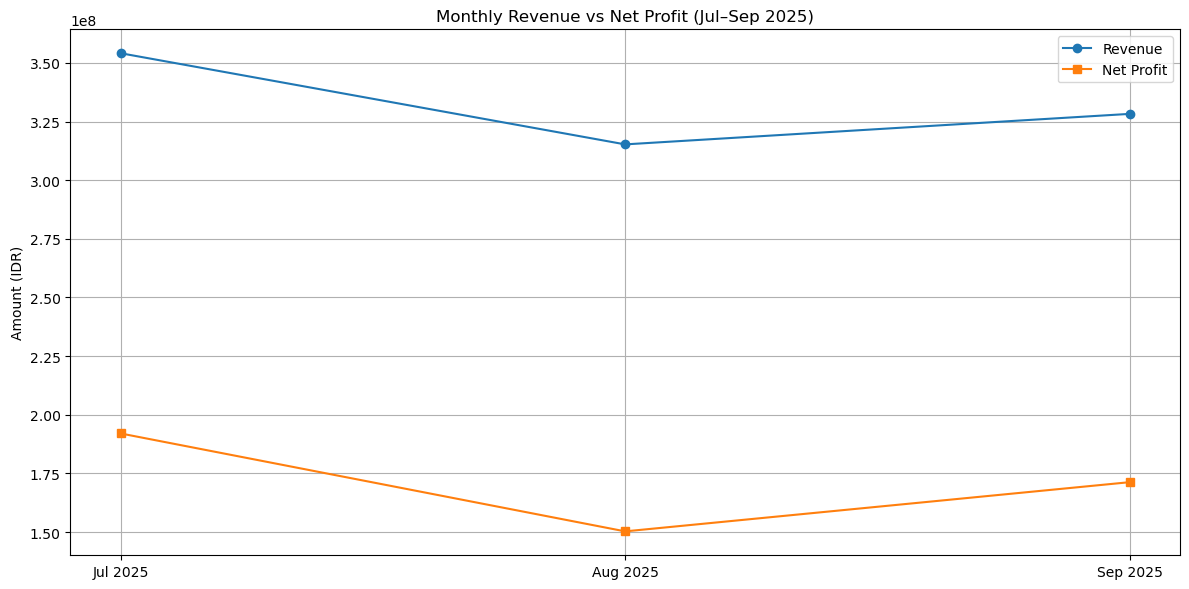

In [49]:
# Siapkan data untuk plot
plot_data = pnl_final.set_index('Period')[['Revenue', 'Net Profit']]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(plot_data.index, plot_data['Revenue'], marker='o', label='Revenue')
plt.plot(plot_data.index, plot_data['Net Profit'], marker='s', label='Net Profit')
plt.title('Monthly Revenue vs Net Profit (Jul–Sep 2025)')
plt.ylabel('Amount (IDR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

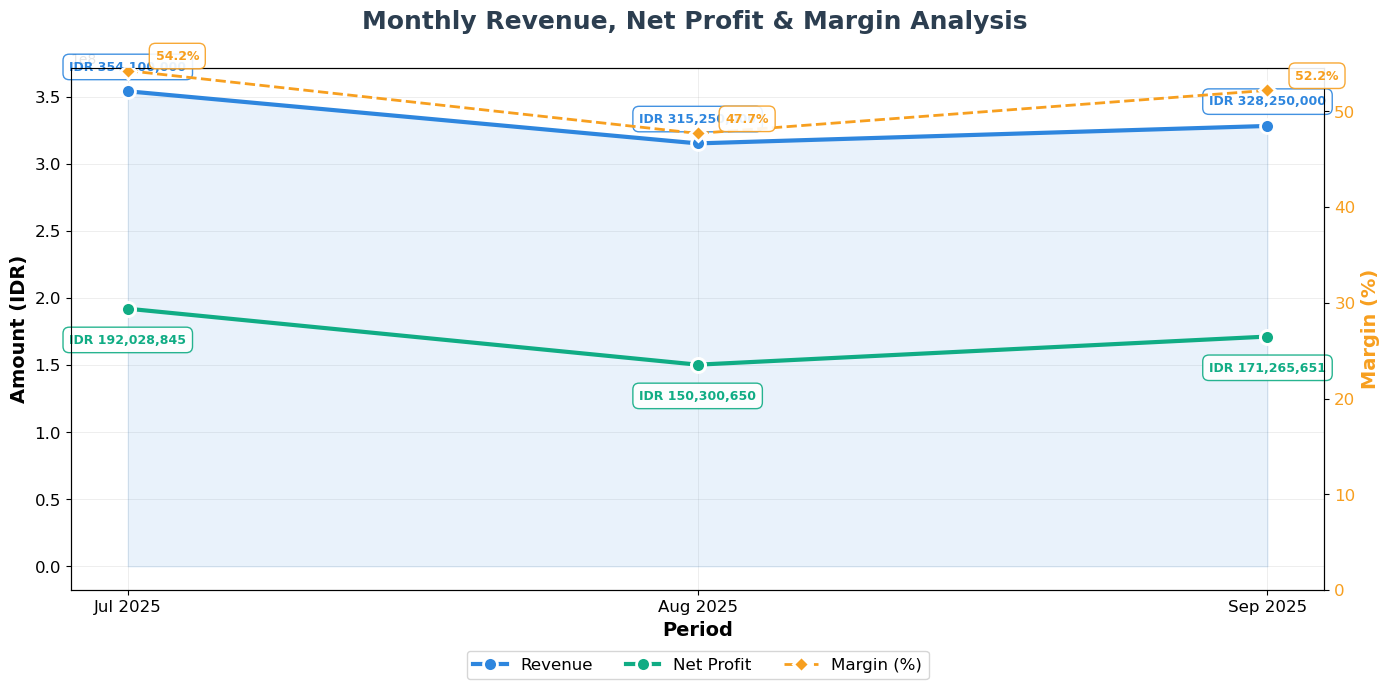

In [50]:
# Validate data
required_cols = ['Period', 'Revenue', 'Net Profit']
missing_cols = [col for col in required_cols if col not in pnl_df.columns]

if missing_cols:
    raise ValueError(f"Missing required columns: {missing_cols}")

# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))
ax2 = ax1.twinx()

# Color scheme
colors = {
    'revenue': '#2E86DE',
    'profit': '#10AC84',
    'loss': '#EE5A6F',
    'margin': '#F79F1F',
}

# Prepare x-axis
x = range(len(pnl_df))
x_labels = pnl_df['Period'].tolist()

# Plot Revenue
line1 = ax1.plot(x, pnl_df['Revenue'], 
                 color=colors['revenue'], 
                 linewidth=3, 
                 marker='o', 
                 markersize=10,
                 markerfacecolor=colors['revenue'],
                 markeredgecolor='white',
                 markeredgewidth=2,
                 label='Revenue',
                 zorder=3)

# Fill under Revenue line
ax1.fill_between(x, pnl_df['Revenue'], alpha=0.1, color=colors['revenue'])

# Plot Net Profit with conditional colors
profit_colors = [colors['profit'] if p >= 0 else colors['loss'] 
                 for p in pnl_df['Net Profit']]

line2 = ax1.plot(x, pnl_df['Net Profit'],
                 color=colors['profit'],
                 linewidth=3,
                 marker='o',
                 markersize=10,
                 markerfacecolor=colors['profit'],
                 markeredgecolor='white',
                 markeredgewidth=2,
                 label='Net Profit',
                 zorder=3)

# Add colored markers for profit/loss
for i, (xi, yi, c) in enumerate(zip(x, pnl_df['Net Profit'], profit_colors)):
    ax1.plot(xi, yi, 'o', markersize=10, 
            color=c, markeredgecolor='white', markeredgewidth=2, zorder=4)

# Plot Margin (%) on secondary axis
if 'Margin (%)' in pnl_df.columns:
    line3 = ax2.plot(x, pnl_df['Margin (%)'],
                    color=colors['margin'],
                    linewidth=2,
                    linestyle='--',
                    marker='D',
                    markersize=8,
                    markerfacecolor=colors['margin'],
                    markeredgecolor='white',
                    markeredgewidth=2,
                    label='Margin (%)',
                    zorder=3)

# Add value annotations
for i, (xi, period) in enumerate(zip(x, pnl_df['Period'])):
    # Revenue annotation
    revenue_val = pnl_df['Revenue'].iloc[i]
    ax1.annotate(f'IDR {revenue_val:,.0f}',
                xy=(xi, revenue_val),
                xytext=(0, 15),
                textcoords='offset points',
                ha='center',
                fontsize=9,
                color=colors['revenue'],
                weight='bold',
                bbox=dict(boxstyle='round,pad=0.5', 
                        facecolor='white', 
                        edgecolor=colors['revenue'],
                        alpha=0.9))
    
    # Net Profit annotation
    profit_val = pnl_df['Net Profit'].iloc[i]
    profit_color = colors['profit'] if profit_val >= 0 else colors['loss']
    ax1.annotate(f'IDR {profit_val:,.0f}',
                xy=(xi, profit_val),
                xytext=(0, -25),
                textcoords='offset points',
                ha='center',
                fontsize=9,
                color=profit_color,
                weight='bold',
                bbox=dict(boxstyle='round,pad=0.5',
                        facecolor='white',
                        edgecolor=profit_color,
                        alpha=0.9))
    
    # Margin annotation
    if 'Margin (%)' in pnl_df.columns:
        margin_val = pnl_df['Margin (%)'].iloc[i]
        ax2.annotate(f'{margin_val:.1f}%',
                    xy=(xi, margin_val),
                    xytext=(20, 8),
                    textcoords='offset points',
                    ha='left',
                    fontsize=9,
                    color=colors['margin'],
                    weight='bold',
                    bbox=dict(boxstyle='round,pad=0.5',
                            facecolor='white',
                            edgecolor=colors['margin'],
                            alpha=0.9))

# Formatting
ax1.set_xlabel('Period', fontsize=14, weight='bold')
ax1.set_ylabel('Amount (IDR)', fontsize=14, weight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, fontsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax1.set_axisbelow(True)

if 'Margin (%)' in pnl_df.columns:
    ax2.set_ylabel('Margin (%)', fontsize=14, weight='bold', color=colors['margin'])
    ax2.tick_params(axis='y', labelcolor=colors['margin'], labelsize=12)
    ax2.set_ylim(bottom=0)

# Title
fig.suptitle("Monthly Revenue, Net Profit & Margin Analysis", fontsize=18, weight='bold', color='#2c3e50')

# Legend
lines1, labels1 = ax1.get_legend_handles_labels()
if 'Margin (%)' in pnl_df.columns:
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, 
              loc='upper center', bbox_to_anchor=(0.5, -0.1),
              ncol=3, fontsize=12, frameon=True, fancybox=True)
else:
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              ncol=2, fontsize=12, frameon=True, fancybox=True)

# Layout
plt.tight_layout()
plt.show()

Creating Fixed Version...


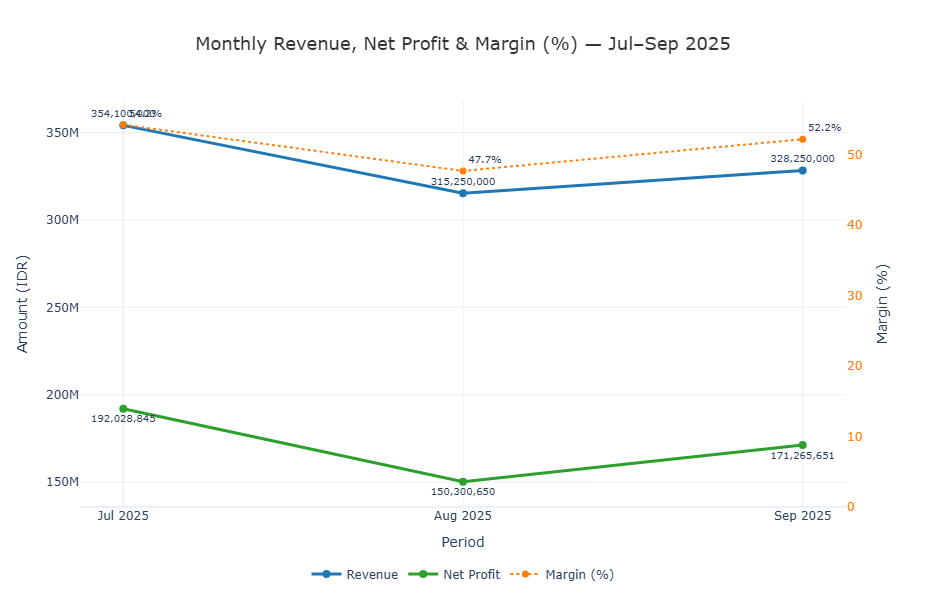


Creating Improved Version...


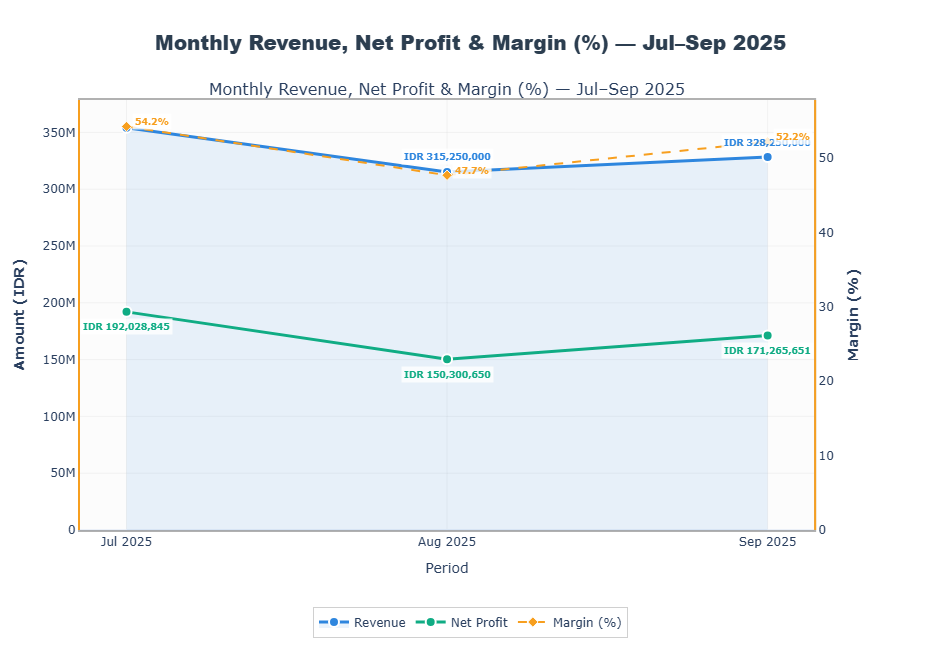


Creating Version with Growth Indicators...


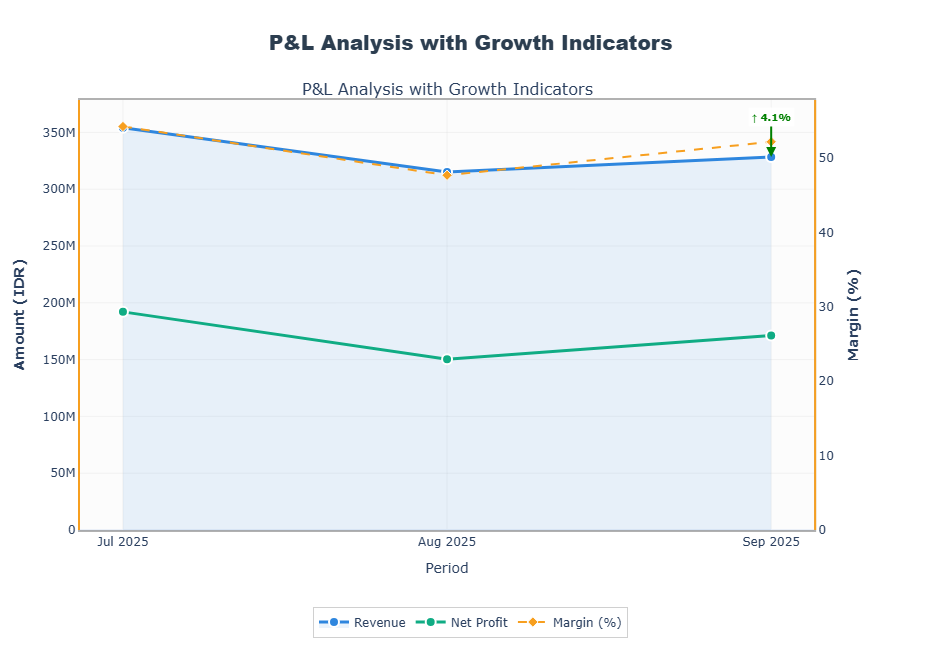

In [51]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# ============================================================
# FIXED VERSION - Original Code with Error Corrections
# ============================================================

def create_pnl_chart_fixed(pnl_df):
    """
    Fixed version of the original chart
    Handles missing columns and data type issues
    """
    # Validate required columns
    required_cols = ['Period', 'Revenue', 'Net Profit']
    missing_cols = [col for col in required_cols if col not in pnl_df.columns]
    
    if missing_cols:
        raise ValueError(f"Missing required columns: {missing_cols}")
    
    # Create figure
    fig = go.Figure()
    
    # Add Revenue trace
    fig.add_trace(go.Scatter(
        x=pnl_df['Period'],
        y=pnl_df['Revenue'],
        mode='lines+markers+text',
        name='Revenue',
        text=[f"{val:,.0f}" for val in pnl_df['Revenue']],
        textposition="top center",
        textfont=dict(size=10),
        line=dict(color='#1f77b4', width=3),
        marker=dict(size=8),
        hovertemplate='<b>Revenue</b><br>Period: %{x}<br>Amount: IDR %{y:,.0f}<extra></extra>'
    ))
    
    # Add Net Profit trace
    fig.add_trace(go.Scatter(
        x=pnl_df['Period'],
        y=pnl_df['Net Profit'],
        mode='lines+markers+text',
        name='Net Profit',
        text=[f"{val:,.0f}" for val in pnl_df['Net Profit']],
        textposition="bottom center",
        textfont=dict(size=10),
        line=dict(color='#2ca02c', width=3),
        marker=dict(size=8),
        hovertemplate='<b>Net Profit</b><br>Period: %{x}<br>Amount: IDR %{y:,.0f}<extra></extra>'
    ))
    
    # Add Margin (%) on right axis if available
    if 'Margin (%)' in pnl_df.columns:
        fig.add_trace(go.Scatter(
            x=pnl_df['Period'],
            y=pnl_df['Margin (%)'],
            mode='lines+markers+text',
            name='Margin (%)',
            text=[f"{val:.1f}%" for val in pnl_df['Margin (%)']],
            textposition="top right",
            textfont=dict(size=10),
            line=dict(color='#ff7f0e', width=2, dash='dot'),
            marker=dict(size=7),
            yaxis='y2',
            hovertemplate='<b>Margin</b><br>Period: %{x}<br>Percentage: %{y:.1f}%<extra></extra>'
        ))
    
    # Layout & Design
    fig.update_layout(
        title=dict(
            text="Monthly Revenue, Net Profit & Margin (%) — Jul–Sep 2025",
            x=0.5,
            xanchor='center',
            font=dict(size=18, color='#333')
        ),
        xaxis=dict(
            title='Period',
            showgrid=True,
            gridcolor='rgba(200,200,200,0.3)'
        ),
        yaxis=dict(
            title='Amount (IDR)',
            showgrid=True,
            zeroline=False,
            gridcolor='rgba(200,200,200,0.3)'
        ),
        yaxis2=dict(
            title='Margin (%)',
            overlaying='y',
            side='right',
            showgrid=False,
            tickfont=dict(color='#ff7f0e'),
            # titlefont=dict(color='#ff7f0e'),
            rangemode='tozero'
        ),
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=-0.2,
            xanchor='center',
            x=0.5,
            bgcolor='rgba(255,255,255,0.8)'
        ),
        template='plotly_white',
        hovermode='x unified',
        height=600
    )
    
    return fig


# ============================================================
# IMPROVED VERSION - Enhanced with More Features
# ============================================================

def create_pnl_chart_improved(pnl_df, title=None, show_annotations=True):
    """
    Improved version with enhanced features:
    - Better color scheme
    - Enhanced interactivity
    - Conditional formatting
    - Better layout
    - Growth indicators
    """
    # Validate data
    required_cols = ['Period', 'Revenue', 'Net Profit']
    missing_cols = [col for col in required_cols if col not in pnl_df.columns]
    
    if missing_cols:
        raise ValueError(f"Missing required columns: {missing_cols}")
    
    # Create figure with secondary y-axis
    from plotly.subplots import make_subplots
    
    fig = make_subplots(
        specs=[[{"secondary_y": True}]],
        subplot_titles=[""] if not title else [title]
    )
    
    # Enhanced color scheme
    colors = {
        'revenue': '#2E86DE',      # Professional blue
        'profit': '#10AC84',       # Green for profit
        'loss': '#EE5A6F',         # Red for loss
        'margin': '#F79F1F',       # Orange for margin
        'grid': 'rgba(200,200,200,0.2)'
    }
    
    # Add Revenue trace with gradient fill
    fig.add_trace(
        go.Scatter(
            x=pnl_df['Period'],
            y=pnl_df['Revenue'],
            mode='lines+markers',
            name='Revenue',
            line=dict(color=colors['revenue'], width=3),
            marker=dict(
                size=10,
                color=colors['revenue'],
                line=dict(color='white', width=2)
            ),
            fill='tozeroy',
            fillcolor=f"rgba(46, 134, 222, 0.1)",
            hovertemplate='<b>Revenue</b><br>Period: %{x}<br>Amount: IDR %{y:,.0f}<extra></extra>'
        ),
        secondary_y=False
    )
    
    # Add Net Profit trace with conditional colors (green for profit, red for loss)
    profit_colors = [colors['profit'] if p >= 0 else colors['loss'] for p in pnl_df['Net Profit']]
    
    fig.add_trace(
        go.Scatter(
            x=pnl_df['Period'],
            y=pnl_df['Net Profit'],
            mode='lines+markers',
            name='Net Profit',
            line=dict(color=colors['profit'], width=3),
            marker=dict(
                size=10,
                color=profit_colors,
                line=dict(color='white', width=2)
            ),
            hovertemplate='<b>Net Profit</b><br>Period: %{x}<br>Amount: IDR %{y:,.0f}<extra></extra>'
        ),
        secondary_y=False
    )
    
    # Add Margin (%) on secondary axis
    if 'Margin (%)' in pnl_df.columns:
        fig.add_trace(
            go.Scatter(
                x=pnl_df['Period'],
                y=pnl_df['Margin (%)'],
                mode='lines+markers',
                name='Margin (%)',
                line=dict(color=colors['margin'], width=2, dash='dash'),
                marker=dict(
                    size=8,
                    color=colors['margin'],
                    symbol='diamond',
                    line=dict(color='white', width=1)
                ),
                hovertemplate='<b>Margin</b><br>Period: %{x}<br>Percentage: %{y:.1f}%<extra></extra>'
            ),
            secondary_y=True
        )
    
    # Add annotations for text labels if enabled
    if show_annotations:
        annotations = []
        
        # Revenue annotations
        for i, row in pnl_df.iterrows():
            # Revenue label
            annotations.append(
                dict(
                    x=row['Period'],
                    y=row['Revenue'],
                    text=f"IDR {row['Revenue']:,.0f}",
                    showarrow=False,
                    yshift=15,
                    font=dict(size=9, color=colors['revenue'], weight='bold'),
                    bgcolor='rgba(255,255,255,0.8)',
                    borderpad=2
                )
            )
            
            # Net Profit label
            annotations.append(
                dict(
                    x=row['Period'],
                    y=row['Net Profit'],
                    text=f"IDR {row['Net Profit']:,.0f}",
                    showarrow=False,
                    yshift=-15,
                    font=dict(
                        size=9,
                        color=colors['profit'] if row['Net Profit'] >= 0 else colors['loss'],
                        weight='bold'
                    ),
                    bgcolor='rgba(255,255,255,0.8)',
                    borderpad=2
                )
            )
            
            # Margin label (if available)
            if 'Margin (%)' in pnl_df.columns:
                annotations.append(
                    dict(
                        x=row['Period'],
                        y=row['Margin (%)'],
                        text=f"{row['Margin (%)']:.1f}%",
                        showarrow=False,
                        xshift=25,
                        yshift=5,
                        font=dict(size=9, color=colors['margin'], weight='bold'),
                        bgcolor='rgba(255,255,255,0.8)',
                        borderpad=2,
                        yref='y2'
                    )
                )
        
        fig.update_layout(annotations=annotations)
    
    # Update axes
    fig.update_xaxes(
        title_text="Period",
        showgrid=True,
        gridcolor=colors['grid'],
        linecolor='rgba(100,100,100,0.5)',
        linewidth=2,
        mirror=True
    )
    
    fig.update_yaxes(
        title_text="<b>Amount (IDR)</b>",
        showgrid=True,
        gridcolor=colors['grid'],
        linecolor='rgba(100,100,100,0.5)',
        linewidth=2,
        mirror=True,
        secondary_y=False
    )
    
    fig.update_yaxes(
        title_text="<b>Margin (%)</b>",
        showgrid=False,
        linecolor=colors['margin'],
        linewidth=2,
        mirror=True,
        rangemode='tozero',
        secondary_y=True
    )
    
    # Update layout
    fig.update_layout(
        title=dict(
            text=title or "Monthly Revenue, Net Profit & Margin Analysis",
            x=0.5,
            xanchor='center',
            font=dict(size=20, color='#2c3e50', family='Arial Black')
        ),
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=-0.25,
            xanchor='center',
            x=0.5,
            bgcolor='rgba(255,255,255,0.9)',
            bordercolor='rgba(100,100,100,0.3)',
            borderwidth=1,
            font=dict(size=12)
        ),
        template='plotly_white',
        hovermode='x unified',
        height=650,
        plot_bgcolor='rgba(250,250,250,0.5)',
        paper_bgcolor='white',
        margin=dict(l=80, r=80, t=100, b=100)
    )
    
    return fig


# ============================================================
# EXAMPLE USAGE WITH SAMPLE DATA
# ============================================================
# Display both versions
print("Creating Fixed Version...")
fig_fixed = create_pnl_chart_fixed(pnl_df)
fig_fixed.show()

print("\nCreating Improved Version...")
fig_improved = create_pnl_chart_improved(
    pnl_df, 
    title="Monthly Revenue, Net Profit & Margin (%) — Jul–Sep 2025",
    show_annotations=True
)
fig_improved.show()

# ============================================================
# ADDITIONAL IMPROVEMENTS: Growth Rate Indicators
# ============================================================

def create_pnl_chart_with_growth(pnl_df, title=None):
    """
    Version with growth rate indicators
    """
    # Calculate growth rates
    pnl_df = pnl_df.copy()
    pnl_df['Revenue_Growth'] = pnl_df['Revenue'].pct_change() * 100
    pnl_df['Profit_Growth'] = pnl_df['Net Profit'].pct_change() * 100
    
    # Create the improved chart
    fig = create_pnl_chart_improved(pnl_df, title, show_annotations=False)
    
    # Add growth rate annotations
    annotations = []
    for i in range(1, len(pnl_df)):
        row = pnl_df.iloc[i]
        prev_row = pnl_df.iloc[i-1]
        
        # Revenue growth indicator
        growth = row['Revenue_Growth']
        arrow = "↑" if growth > 0 else "↓"
        color = "green" if growth > 0 else "red"
        
        annotations.append(
            dict(
                x=row['Period'],
                y=row['Revenue'],
                text=f"{arrow} {abs(growth):.1f}%",
                showarrow=True,
                arrowhead=2,
                arrowsize=1,
                arrowwidth=2,
                arrowcolor=color,
                ax=0,
                ay=-40,
                font=dict(size=10, color=color, weight='bold'),
                bgcolor='rgba(255,255,255,0.9)',
                borderpad=3
            )
        )
    
    fig.update_layout(annotations=annotations)
    
    return fig

# Example with growth indicators
print("\nCreating Version with Growth Indicators...")
fig_growth = create_pnl_chart_with_growth(pnl_df, title="P&L Analysis with Growth Indicators")
fig_growth.show()